In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split

churn_data=pd.read_csv(r'C:\Users\defaultuser0.LAPTOP-LRB3T941\Documents\Tensorflow\DATACAMP\scikitlearn\telecom_churn_clean.csv')

In [3]:
# Import xgboost
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Create arrays for the features and the target: X, y
X, Y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

pipe=[ ('scle',StandardScaler() ), ('models',LogisticRegression(max_iter=1000) ) ] 
logreg=Pipeline(pipe)
# Fit the classifier to the training set
X_train2=xgb.DMatrix(X_train)
xg_cl.fit(X_train,y_train)
logreg.fit(X_train,y_train)
# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)
# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print(  "accuracy XGBOOST: %f" % (accuracy) , "accuracy logistic: ", logreg.score(X_test,y_test)    )


accuracy XGBOOST: 0.964018 accuracy logistic:  0.8725637181409296


In [4]:
import autoviz
#AV=AutoViz_Class()
#dft=AV.AutoViz(dfte=churn_data)z

ModuleNotFoundError: No module named 'bokeh.models.arrow_heads'

//LECTURE NOTE

Got It!
1. What is a decision tree?
Because XGBoost is usually used with trees as base learners, we need to understand what an individual decision tree is, and how it works.

2. Visualizing a decision tree
Here is an example decision tree. As you can see, it has a single question that is being asked at each decision node, and only 2 possible choices, at the very bottom of each decision tree, there is a single possible decision. In this example decision tree for whether to purchase a vehicle, the first question you ask is whether it has been road-tested. If it hasn't, you immediately decide not to buy, otherwise, you continue asking questions, such as what the vehicle's mileage is, and, if its age is old or recent. At bottom, every possible decision will eventually lead to a choice, some taking many fewer questions to get to those choices than others.

1 https://www.ibm.com/support/knowledgecenter/en/SS3RA7_15.0.0/ com.ibm.spss.modeler.help/nodes_treebuilding.htm
3. Decision trees as base learners
The concept of a base learner will be covered more extensively later, but for now, just think of any individual learning algorithm in an ensemble algorithm as a base learner. This is important because XGBoost itself is an ensemble learning method in that it uses the outputs of many models for a final prediction. Anyway, as you saw in the previous slide, a decision tree is a learning method that involves a tree-like graph to model either a continuous or categorical choice given some data. It is composed of a series of binary decisions (yes/no or true/false questions) that when answered in succession ultimately yield a prediction about the data at hand (these predictions happen at the leaves of the tree).

4. Decision trees and CART
Decision trees are constructed iteratively (that is, one binary decision at a time) until some stopping criterion is met (the depth of the tree reaches some pre-defined maximum value, for example). During construction, the tree is built one split at a time, and the way that a split is selected (that is, what feature to split on and where in the feature's range of values to split) can vary, but involves choosing a split point that segregates the target values better (puts each target category into buckets that are increasingly dominated by just one category) until all (or nearly all) values within a given split are exclusively of one category or another. Using this process, each leaf of the decision tree will have a single category in the majority, or should be exclusively of one category.

5. Individual decision trees tend to overfit
Individual decision trees in general are low-bias, high-variance learning models.

1 http://scott.fortmann-roe.com/docs/BiasVariance.html
6. Individual decision trees tend to overfit
That is, they are very good at learning relationships within any data you train them on, but they tend to overfit the data you use to train them on and usually generalize to new data poorly. XGBoost uses a slightly different kind of a decision tree,

1 http://scott.fortmann-roe.com/docs/BiasVariance.html
7. CART: Classification and Regression Trees
called a classification and regression tree, or CART. Whereas for the decision trees described above the leaf nodes always contain decision values, CART trees contain a real-valued score in each leaf, regardless of whether they are used for classification or regression. The real-valued scores can then be thresholded to convert into categories for classification problems if necessary.

8. Let's work with some decision trees!
Awesome, let's get to working with some decision trees!



In [ ]:
# Import the necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.9070464767616192



Got It!
1. What is Boosting?
Now that we've reviewed both supervised learning and the basics of decision trees, lets talk about the core concept that gives XGBoost its state-of-the-art performance, boosting.

2. Boosting overview
At bottom, boosting isn't really a specific machine learning algorithm, but a concept that can be applied to a set of machine learning models. So, its really a meta-algorithm. Specifically, it is an ensemble meta-algorithm primarily used to reduce any given single learner's variance and to convert many weak learners into an arbitrarily strong learner.

3. Weak learners and strong learners
A weak learner is any machine learning algorithm that is just slightly better than chance. So, a decision tree that can predict some outcome slightly more frequently than pure randomness would be considered a weak learner. The principal insight that allows XGBoost to work is the fact that you can use boosting to convert a collection of weak learners into a strong learner. Where a strong learner is any algorithm that can be tuned to achieve arbitrarily good performance for some supervised learning problem.

4. How boosting is accomplished
How is this accomplished? By iteratively learning a set of weak models on subsets of the data you have at hand, and weighting each of their predictions according to each weak learner's performance. You then combine all of the weak learners' predictions multiplied by their weights to obtain a single final weighted prediction that is much better than any of the individual predictions themselves. It's kind of incredible that this works as well as it does.

5. Boosting example
Here is a very basic example of boosting using 2 decision trees. This example comes from the XGBoost documentation and shows that given a specific example, each tree gives a different prediction score depending on the data it sees. The prediction scores for each possibility are summed across trees and the prediction is simply the sum of the scores across both trees. Here, you can see that whatever it was we were trying to predict, the little boy had a higher predicted score summed across both trees than the old man.

1 https://xgboost.readthedocs.io/en/latest/model.html
6. Model evaluation through cross-validation
Since we will be working with XGBoost's learning API for model evaluation next, it's a good idea to briefly provide you with an example that shows how model evaluation using cross-validation works with XGBoost's learning API (which is different from the scikit-learn compatible API) as it has cross-validation capabilities baked in. As a refresher, cross-validation is a robust method for estimating the expected performance of a machine learning model on unseen data by generating many non-overlapping train/test splits on your training data and reporting the average test set performance across all data splits.

7. Cross-validation in XGBoost example
So, in lines 1 and 2 we import what we will be using. In line 3, we load in our example dataset. In line 4, we convert our dataset into an optimized data structure that the creators of XGBoost made that gives the package its lauded performance and efficiency gains called a DMatrix. In the previous exercise, the input datasets were converted into DMatrix data on the fly, but when we use the XGBoost cv object, which is part of XGBoost's learning api we have to first explicitly convert our data into a DMatrix. So, that's what we are doing here before we run our cross-validation. In line 5, we are creating a parameter dictionary to pass into our cross-validation. This is necessary because the cv method has no idea what kind of XGBoost model we are using and expects us to provide that information as a dictionary of appropriate key-value pairs. Our parameter dictionary here is bare-bones, only providing the objective function we would like to use and the maximum depth that every tree can grow to. In line 6, we call the cv method and pass in our DMatrix object storing all of our data, the parameter dictionary, the number of cross-validation folds, how many trees we want to build, what metric we want to compute, and whether we want our output to be stored as a pandas dataframe. In line 7 we simply convert our metrics into an accuracy and output the results to screen.

8. Let's practice!
Now it's your turn!



In [ ]:

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=Y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.091809         0.003729         0.100810        0.009031
1          0.091209         0.003414         0.102310        0.010505
2          0.085059         0.000735         0.096310        0.013471
3          0.079358         0.004682         0.093609        0.012143
4          0.076208         0.004893         0.092109        0.016006
0.9078907890789079


In [ ]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)
# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.836970       0.004261       0.823101      0.022819
1        0.852943       0.015413       0.842076      0.016330
2        0.884122       0.009758       0.872564      0.028379
3        0.898340       0.001999       0.886186      0.017050
4        0.903081       0.001136       0.891238      0.017270
0.8912382461067782



Got It!
1. When should I use XGBoost?
So, given everything we've said about XGBoost, when should (and shouldn't) you use it?

2. When to use XGBoost
Given that I've already talked a bit about when and where XGBoost shines, some of this shouldn't come as a surprise to you. You should consider using XGBoost for any supervised machine learning task that fits the following criteria: You have a large number of training examples. Although your definition of large can vary, I intend it to mean a dataset that has few features and at least 1000 examples. However, in general, as long as the number of features in your training set is smaller than the number of examples you have, you should be fine. Finally, XGBoost tends to do well when you have a mixture of categorical and numeric features, or when you have just numeric features.

3. When to NOT use XGBoost
When should you not use XGBoost? The most important kinds of problems where XGBoost is a suboptimal choice involve either those that have found success using other state-of-the-art algorithms or those that suffer from dataset size issues. Specifically, XGBoost is not ideally suited for image recognition, computer vision, or natural language processing and understanding problems, as those kinds of problems can be much better tackled using deep learning approaches. In terms of dataset size problems, XGBoost is not suitable when you have very small training sets ( less than 100 training examples) or when the number of training examples is significantly smaller than the number of features being used for training.

4. Let's practice!
Ok, let's finish off what you learned in chapter 1 with one last multiple choice question!



CHAPTER TWO STARTS HERE


Got It!
1. Objective (loss) functions and base learners
Let's talk a bit about objective functions and base learners so we can develop better intuitions about both concepts, as they are critical to understand in order for you to be able to grasp why XGBoost is such a powerful approach to building supervised regression models.

2. Objective Functions and Why We Use Them
An objective or loss function quantifies how far off our prediction is from the actual result for a given data point. It maps the difference between the prediction and the target to a real number. When we construct any machine learning model, we do so in the hopes that it minimizes the loss function across all of the data points we pass in. That's our ultimate goal, the smallest possible loss.

3. Common loss functions and XGBoost
Loss functions have specific naming conventions in XGBoost. For regression models, the most common loss function used is called reg linear. For binary classification models, the most common loss functions used are reg logistic, when you simply want the category of the target, and binary logistic, when you want the actual predicted probability of the positive class. So, in chapter 1, we were implicitly using the reg logistic loss function when building our classification models in XGBoost.

4. Base learners and why we need them
As mentioned before, XGBoost is an ensemble learning method composed of many individual models that are added together to generate a single prediction. Each of the individual models that are trained and combined are called base learners. The goal of XGBoost is to have base learners that is slightly better than random guessing on certain subsets of training examples, and uniformly bad at the remainder, so that when all of the predictions are combined, the uniformly bad predictions cancel out and those slightly better than chance combine into a single very good prediction. Let's look at a couple examples using trees and linear base learners in XGBoost.

5. Trees as base learners example: Scikit-learn API
Here's an example of how to train an XGBoost regression model with trees as base learners using XGBoost's scikit-learn compatible API. We will use the Boston Housing dataset from UCI's machine learning repository as an example. In lines 1-5 we import the libraries we need and load in the data. In lines 6 and 7, we convert our data into our X matrix and y vector and split into training and test sets as we've done before. In lines 8-10, we create our XGBoost regressor object, this time making sure we use the reg linear objective function, fit it to our training data, and generate our predictions on the test set.

6. Trees as base learners example: Scikit-learn API
And finally in lines 11 and 12 we compute the RMSE and print the result to screen.

7. Linear base learners example: learning API only
To use linear base learners, we have to use the learning API in XGBoost. Here's an example. In lines 1-7 we do what we did as before, loading in appropriate libraries and data. In lines 8 and 9 we convert our training and testing sets into DMatrix objects, as is required by the learning API. In line 10 we create a parameter dictionary explicitly specifying the base learner we want as gblinear, and the reg linear objective function we want to use. In lines 11-12 we train our model on the training set and generate predictions using the test set.

8. Linear base learners example: learning API only
In lines 13 and 14, we compute our rmse and print to screen, as we did before.

9. Let's get to work!
Ok, lets get to work!



In [ ]:
# Create the training and test sets
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=10,seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(preds, y_test))
print("RMSE: %f" % (rmse))

RMSE: 0.196624


In [ ]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train( params= params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[15:01:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.321358


In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=Y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

[15:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=Y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

[15:01:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:01:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0        0.385


Got It!
1. Regularization and base learners in XGBoost
Loss functions in XGBoost don't just take into account how close a model's predictions are to the actual values,

2. Regularization in XGBoost
but also take into account how complex the model is. This idea of penalizing models as they become more complex is called regularization. So, loss functions in XGBoost are used to find models that are both accurate and as simple as they can possibly be. There are several parameters that can be tweaked in XGBoost to limit model complexity by altering the loss function. Gamma is a parameter for tree base learners that controls whether a given node on a base learner will split based on the expected reduction in the loss that would occur after performing the split, so that higher values lead to fewer splits. Alpha is another name for L1 regularization. However, this regularization term is a penalty on leaf weights rather than on feature weights, as is the case in linear or logistic regression. Higher alpha values lead to stronger L1 regularization, which causes many leaf weights in the base learners to go to 0. Lambda is another name for l2 regularization. L2 regularization is a much smoother penalty that l1 and causes leaf weights to smoothly decrease, instead of enforcing strong sparsity constraints on the leaf weights as in l1. If you're interested in learning more about regularization, check out DataCamp's Supervised Learning With Scikit Learn Course.

3. L1 regularization in XGBoost example
Let's look at an example of how you can tune one of these regularization parameters using XGBoost. As always, in lines 1-4 we import the necessary libraries, load in the data we will be working with, and create our feature matrix and target vectors X and y. In line 5 we convert our X matrix and y vector into a single optimized DMatrix object, and in line 6 we create our parameter dictionary that defines some required parameters for our learner. Specifically, we provide the loss function necessary for regression, and the maximum depth each tree base learner can have. In line 7 we create a list of 3 different l1 or alpha values that we will try, and in line 8 we initialize an empty list that will store our final root mean square error for each of these l1 or alpha values. Line 9 is actually a multi-line for loop where we iterate over each entry in our l1_params list and do the following. First, we create a new key-value pair in our parameter dictionary that holds our current alpha value. We then run our XGBoost cross validation by passing in our DMatrix object, updated parameter dictionary, number of folds we want to cross-validate, number of trees we want as num_boost_round, the metric we want to compute, which is rmse, and that we want to output the results as a pandas DataFrame. In lines 10 and 11, we simply look at the final RMSE as a function of l1 regularization strength. At this point, we've talked about

4. Base learners in XGBoost
base learners and regularization quite a bit. Let's finish this off by comparing the two kinds of base learners that exist in XGBoost. The linear base learner is simply a sum of linear terms, exactly as you would find in a linear or logistic regression model. When you combine many of these base models into an ensemble, you get a weighted sum of linear models, which is itself linear. Since you don't get any nonlinear combination of features in the final model, this approach is rarely used, as you can get identical performance from a regularized linear model. The tree base learner uses decision trees as base models. When the decision trees are all combined into an ensemble, their combination becomes a nonlinear function of each individual tree, which itself is nonlinear. At this point, I want to briefly mention how you'll see

5. Creating DataFrames from multiple equal-length lists
Dataframes being created in the next couple exercises after you've computed your results. We will use both the zip and list function, one inside of the other, to convert multiple equal-length lists into a single object that we can convert into a pandas dataframe. Zip is a function that allows you to take multiple equal-length lists and iterate over them in parallel, side by side, as shown above. However, in python 3, zip creates a generator, or an object that doesn't have to be completely instantiated at runtime. In order for the entire zipped pair of lists to be instantiated, we have to cast the zip generator object into a list directly. After casting, we can convert this object directly into a dataframe. The point of all of this is, don't feel overwhelmed when you see this pattern in the following exercises, as its very useful and will only make you a stronger Python programmer and data scientist.

6. Let's practice!
Now, it's your turn to perform l2 regularization with an XGBoost model in the following exercises. In addition, you'll learn how to visualize feature importances in your model.



In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=Y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg 
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

[15:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

[15:45:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


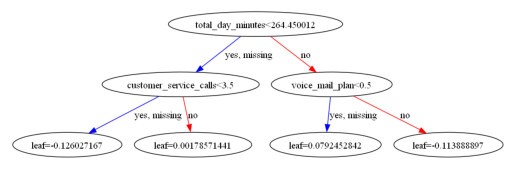

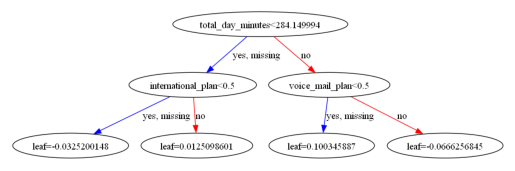

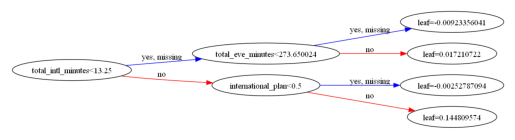

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=Y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg,num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg,num_trees=9,rankdir="LR")

plt.show()

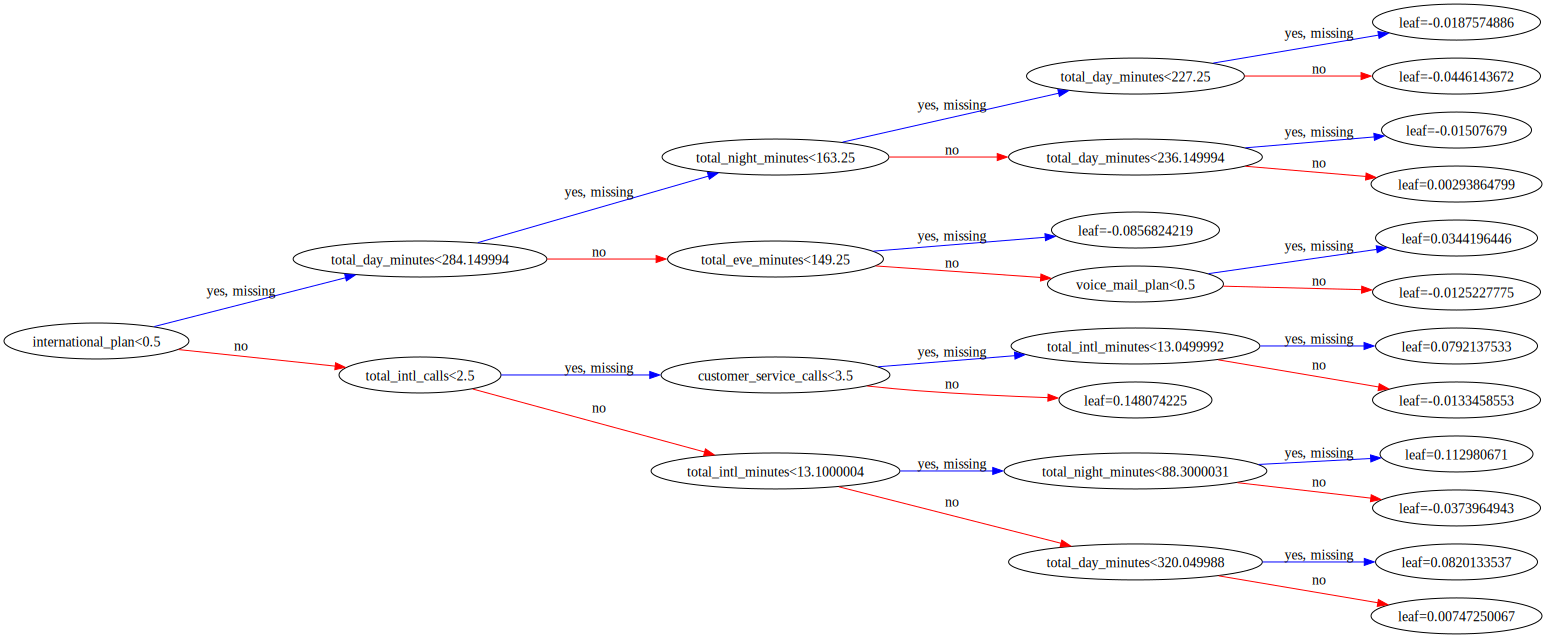

In [ ]:
xgb.to_graphviz(xg_reg, num_trees=6, rankdir='LR')


[15:47:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


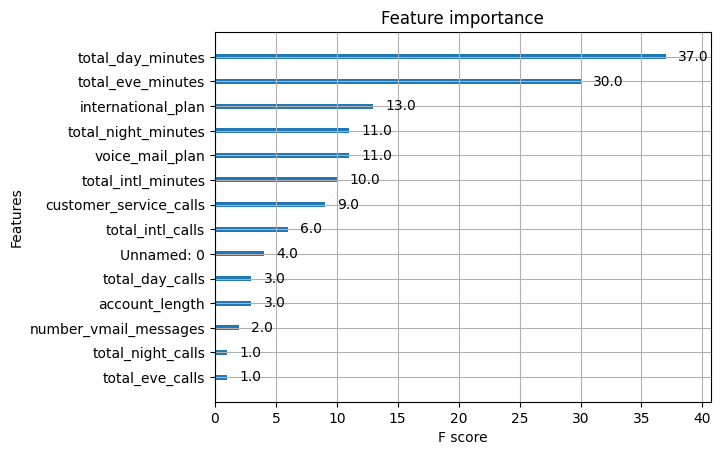

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=Y)

# Create the parameter dictionary: params
params = {'objective':'reg:linear','max_depth':4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params,dtrain=housing_dmatrix,num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

CHAPTER THREE STARTS HEREW


Got It!
1. Why tune your model?
So far, you've learned how to use XGBoost to solve classification and regression problems. Now, you'll learn how to supercharge those models by tuning them. To motivate the reason behind this chapter on tuning your XGBoost model, let's just take a look at 2 cases, one where we take the simplest XGBoost model possible and compute a cross-validated RMSE, and then do the same exact thing with a tuned XGBoost model. What do you think the effect of model tuning on the overall reduction in RMSE will be?

2. Untuned model example
In lines 1-6, we simply load in the necessary libraries and ames housing data, and then convert our data into a DMatrix. In line 7, we create the most basic parameter configuration possible, only passing in the objective function we need to create a regression XGBoost model. This parameter configuration will be made much more complex as we tune our models. In fact, when performing parameter searches, we will use a dictionary that we typically call a parameter grid, because it will contain ranges of values over which we will search to find an optimal configuration. More on that later. In line 8, we run our cross-validation in XGBoost, passing in the simple parameter grid and telling it to run 4-fold cross validation, and to ouput the rmse as an evaluation metric. In line 9, we simply print the final rmse of the untuned model to screen, which is around 34600 dollars.

3. Tuned model example
Now let's take a look at a tuned example. Again, in lines 1-6, we load in the necessary libraries and ames housing data, and then convert our data into a DMatrix. In line 7, we create a more tuned parameter configuration, setting colsample_bytree, learning_rate, and max_depth to better values. These are a few of the more important xgboost parameters that can be tuned, and you will learn more about and practice tuning these parameters later in this chapter. In line 8, we run our cross-validation in XGBoost, passing in our tuned parameter grid, as well as setting the number of trees to be constructed at 200, and again running 4-fold cross validation, and outputting the rmse as an evaluation metric. In line 9, we print the final rmse of the tuned model to screen, which is around 29800 dollars. That's an almost 14% reduction in RMSE!

4. Let's tune some models!
Now that you see that you can get a significant improvement in model performance by tuning an XGBoost model, let's have you start doing some tuning yourself!



In [ ]:
data=pd.read_csv('ames_housing_trimmed_processed.csv')
from sklearn.model_selection import train_test_split
yf=data['SalePrice']
xf=data.drop('SalePrice',axis=1)
#data.columns
xf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,0,1,0,0,0,1
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,0,1,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,0,1,0,0,0,1
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
yf.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
X,X_TEST,Y,Y_TEST=train_test_split(xf,yf,test_size=.2,random_state=666)

In [ ]:
housing_dmatrix=xgb.DMatrix(data=X,label=Y)
params={'objective':'reg:squarederror','max_depth':3}
result=[]
final_rmse_per_round=[]
num_tress=[2,10,15,20,40,90,150,1000]
for num in num_tress:
    cv_results=xgb.cv(dtrain=housing_dmatrix,as_pandas=True,params=params,seed=666,metrics='rmse',num_boost_round=num)
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])
num_round=list(zip(num_tress,final_rmse_per_round))
print(pd.DataFrame(num_round,columns=['round','score']))


   round          score
0      2  104386.876771
1     10   36849.109588
2     15   35978.514121
3     20   36091.423558
4     40   35419.170960
5     90   35279.636274
6    150   35547.152549
7   1000   36006.787524


Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the early_stopping_rounds parameter in xgb.cv() with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up through when num_boost_rounds is reached, then early stopping does not occur.



In [ ]:
cv_results_NEW=xgb.cv(nfold=3,dtrain=housing_dmatrix,params=params,metrics='rmse',early_stopping_rounds=7,as_pandas=True,num_boost_round=90,seed=666)
print(cv_results_NEW)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141699.292503     1087.498779   142349.562446    1883.461001
1     103205.224301      781.867539   104386.876771    2073.972440
2      76695.691748      555.215771    79144.007829    2382.242502
3      58487.206594      446.276590    62264.969245    1865.712240
4      46227.522020      367.016430    51579.677659    1158.908383
5      38184.664460      335.180312    45405.566684     470.338428
6      32734.831824      376.911407    41544.632497     653.371767
7      29024.100490      199.794471    39374.212172    1892.084142
8      26580.542657      209.683723    37833.301137    2812.380032
9      24817.440826      217.702173    36849.109588    3565.099772
10     23533.730681      108.346487    36626.673928    4434.485240
11     22611.379517      106.555663    36605.268804    5081.177628
12     21882.435096      159.549862    36240.739761    5273.972869
13     21131.032751      145.807571    36076.497251    5737.45


Got It!
1. Tunable parameters in XGBoost
Let's now go over the differences in what parameters can be tuned for each kind of base model in XGBoost. The parameters that can be tuned are significantly different for each base learner.

2. Common tree tunable parameters
For the tree base learner, which is the one you should use in almost every single case, the most frequently tuned parameters are outlined below. The learning rate affects how quickly the model fits the residual error using additional base learners. A low learning rate will require more boosting rounds to achieve the same reduction in residual error as an XGBoost model with a high learning rate. Gamma, alpha, and lambda were described in chapter 2 and all have an effect on how strongly regularized the trained model will be. Max_depth must a positive integer value and affects how deeply each tree is allowed to grow during any given boosting round. Subsample must be a value between 0 and 1 and is the fraction of the total training set that can be used for any given boosting round. If the value is low, then the fraction of your training data used would per boosting round would be low and you may run into underfitting problems, a value that is very high can lead to overfitting as well. Colsample_bytree is the fraction of features you can select from during any given boosting round and must also be a value between 0 and 1. A large value means that almost all features can be used to build a tree during a given boosting round, whereas a small value means that the fraction of features that can be selected from is very small. In general, smaller colsample_bytree values can be thought of as providing additional regularization to the model, whereas using all columns may in certain cases overfit a trained model.

3. Linear tunable parameters
For the linear base learner, the number of tunable parameters is significantly smaller. You only have access to l1 and l2 regularization on the weights associated with any given feature, and then another regularization term that can be applied to the model's bias. Finally, its important to mention that the number of boosting rounds (that is, either the number of trees you build or the number of linear base learners you construct) is itself a tunable parameter.

4. Let's get to some tuning!
Now that we've covered the parameters that are usually tuned when using XGBoost, lets get to some tuning!



In [6]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=Y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01,0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results =xgb.cv(params=params,nfold=3,dtrain=housing_dmatrix,metrics='rmse',seed=123,num_boost_round=10,early_stopping_rounds=5,as_pandas=True)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])


#print(cv_results)
# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta  best_rmse
0  0.001   0.496574
1  0.010   0.467593
2  0.100   0.307309


In [8]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=Y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(params=params,dtrain=housing_dmatrix,seed=123,early_stopping_rounds=5,num_boost_round=10,metrics='rmse',as_pandas=True,nfold=2)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth  best_rmse
0          2   0.264271
1          5   0.206316
2         10   0.222484
3         20   0.229464


In [10]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=Y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [.1,.5,.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree  best_rmse
0               0.1   0.337016
1               0.5   0.247944
2               0.8   0.233452
3               1.0   0.232734



Got It!
1. Review of grid search and random search
How do we find the optimal values for several hyperparameters simultaneously, leading to the lowest loss possible, when their values interact in in non-obvious, non-linear ways? Two common strategies for choosing several hyperparameter values simultaneously are Grid Search and Random Search, so it's important that we review them here, and see what their advantages and disadvantages are, by looking at some examples of how both can be used with the XGBoost and scikit-learn packages.

2. Grid search: review
Grid Search is a method of exhaustively searching through a collection of possible parameter values. For example, if you have 2 hyperparameters you would like to tune, and 4 possible values for each hyperparameter, then a grid search over that parameter space would try all 16 possible parameter configurations. In a grid search, you try every parameter configuration, evaluate some metric for that configuration, and pick the parameter configuration that gave you the best value for the metric you were using, which in our case will be the root mean squared error.

3. Grid search: example
Let's go over an example of how to grid search over several hyperparameters using XGBoost and scikit learn. In lines 1-4 we load in the necessary libraries, including GridSearchCV from sklearn dot model_selection. In lines 5-7 we load in our dataset and convert it into a DMatrix. In line 8 we create our grid of hyperparameters we want to search over. We selected 4 different learning rates (or eta values), 3 different subsample values, and a single number of trees. The total number of distinct hyperparameter configurations is 12, so 12 different models will be built. In line 9 we create our regressor, and then in line 10 we pass the xgbregressor object, parameter grid, evaluation metric, and number of cross validation folds to GridSearchCV and then immediately fit that gridsearch object in line 11, just like every other scikit learn estimator object we've done this to in the past. In line 12, having fit the gridsearch object, we can extract the best parameters the grid search found, and print them to the screen. In line 13, we get the RMSE that corresponds to the best parameters found, and see that it's ~28500 dollars.

4. Random search: review
Random search is significantly different from grid search in that the number of models that you are required to iterate over doesn't grow as you expand the overall hyperparameter space. In random search, you get to decide how many models, or iterations, you want to try out before stopping. Random search simply involves drawing a random combination of possible hyperparameter values from the range of allowable hyperparameters a set number of times. Each time, you train a model with the selected hyperparameters, evaluate the performance of that model, and then rinse and repeat. When you've created the number of models you had specified initially, you simply pick the best one. To finish this lesson off,

5. Random search: example
let's look at a full random search example. In lines 1-7, we load in the necessary modules, this time loading in RandomizedSearchCV from sklearn dot model_selection, and then load in and convert the data we need to a DMatrix object as always. In line 8 we create our parameter grid, this time generating a large number of learning rate values and subsample values using np-dot-arange. There are 20 values for learning_rate (or eta) and 20 values for subsample, which would be 400 models to try if we were to run a grid search (which we aren't doing here). In line 9 we create our xgbregressor object, and in line 10 we create our RandomizedSearchCV object, passing in the xgbregressor and parameter grid we had just created. We also set the number of iterations we want the random search to proceed to 25, so we know it will not be able to try all 400 possible parameter configurations. We also specify the evaluation metric we want to use, and that we want to run 4-fold cross-validation on each iteration. In line 11 we fit our randomizedsearchcv object, which can take a bit of time. Finally, lines 12 and 13 print the best model parameters found, and the corresponding best RMSE.

6. Let's practice!
Ok, now let's have you practice both grid search and random search in the following exercises.

In [11]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2,5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid=gbm_param_grid,estimator=gbm,scoring='neg_mean_squared_error' ,cv=4,verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X,Y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  0.21807952154633709


In [12]:
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth':range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid,scoring='neg_mean_squared_error',n_iter=5,cv=4,verbose=1,estimator=gbm)


# Fit randomized_mse to the data
randomized_mse.fit(X,Y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 6}
Lowest RMSE found:  0.2135059513789834


CHAPTER 4 STATTS HERE !!!!!



Got It!
1. Review of pipelines using sklearn
Let's begin the final chapter in this course by reviewing how pipelines are used in scikit-learn. Refreshing our memory about how pipelines work will allow us to use XGBoost effectively in pipelines going forward. Before working through an example script using pipelines, lets briefly go over how they work.

2. Pipeline review
Pipelines in sklearn are objects that take a list of named tuples as input. The named tuples must always contain a string name as the first element in each tuple and any scikit-learn compatible transformer or estimator object as the second element. Each named tuple in the pipeline is called a step, and the list of transformations that are contained in the list are executed in order once some data is passed through the pipeline. This is done using the standard fit/predict paradigm that is standard in scikit-learn. Finally, where pipelines are really useful is that they can be used as input estimator objects into other scikit-learn objects themselves, the most useful of which are the cross_val_score method, which allows for efficient cross-validation and out of sample metric calculation, and the grid search and random search approaches for tuning hyperparameters.

3. Scikit-learn pipeline example
Now that we've talked about how pipelines work, lets seem them in action. In this example, we will use the Boston Housing dataset. As you've seen many times before, we first import all of the functionality we will need for the example. We will use a randomforestregressor model to predict housing prices, and will import pipeline from sklearn's pipeline submodule. In lines 2-4, we load in our data and create our X feature matrix and y target vector. Lines 5-6 are the ones that do the real work here. In line 5, we create our pipeline, which contains a standardscaler transformer followed by our RandomForestRegressor estimator. Line 6 takes the just created pipeline estimator as an input along with our X matrix and y vector and performs 10-fold cross-validation using the pipeline and the data and outputs the neg_mean_squared_error as an evaluation metric once per fold. As a brief aside, neg_mean_squared_error is scikit-learn's API-specific way of calculating the mean squared error in an API-compatible way. Negative mean squared errors don't actualy exist as all squares must be positive when working with real numbers.

4. Scikit-learn pipeline example
Thus, in lines 7 and 8 we simply take the absolute value of the scores, take each of their square roots, and compute their mean to get a root mean squared error across all 10 cross-validation folds. We can see that on average our prediction was off by about 4-point-5 units. In the following exercises, because we will be working with the Ames housing dataset, which is more complex than the Boston housing dataset,

5. Preprocessing I: LabelEncoder and OneHotEncoder
some additional preprocessing steps will be required. Specifically, we will do the same preprocessing steps in two different ways, only one of which can be done within a pipeline. The first approach involves using the LabelEncoder and OneHotEncoder classes of scikit-learn’s preprocessing submodule one after the other. LabelEncoder simply converts a categorical column of strings into integers that map onto those strings. OneHotEncoder takes a column of integers that are treated as categorical values, and encodes them as dummy variables, which you may already be familiar with. The problem with this 2-step method, however, is that it cannot currently be done within a pipeline. However, not all hope is lost. The second approach,

6. Preprocessing II: DictVectorizer
which involves using a dict-vectorizer, can accomplish both steps in one line of code.The DictVectorizer is a class found in scikit-learn’s feature extraction submodule, and is traditionally used in text processing pipelines by converting lists of feature mappings into vectors. Using pandas DataFrames, we don’t initially have such a list, however, if we explicitly convert a DataFrame into a list of dictionary entries, then we have exactly what we need. For more details on these classes, I encourage you to explore the scikit-learn documentation.

7. Let's build pipelines!
You will use both approaches in the next few exercises. I hope you have fun building pipelines!



In [1]:
import pandas as pd
df=pd.read_csv('ames_unprocessed_data (1).csv')


In [2]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Fill missing values with 0
df.LotFrontage = df['LotFrontage'].fillna(0)
df_NEW=df
# Create a boolean mask for categorical columns
categorical_mask = ( df.dtypes== object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())
print(df_NEW[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         

In [3]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# Create OneHotEncoder: ohe
ohe = OneHotEncoder()

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

  (0, 5)	1.0
  (0, 18)	1.0
  (0, 57)	1.0
  (0, 458)	1.0
  (0, 1209)	1.0
  (0, 1229)	1.0
  (0, 1239)	1.0
  (0, 1248)	1.0
  (0, 1256)	1.0
  (0, 1365)	1.0
  (0, 1373)	1.0
  (0, 1906)	1.0
  (0, 2237)	1.0
  (0, 2240)	1.0
  (0, 2245)	1.0
  (0, 2248)	1.0
  (0, 2253)	1.0
  (0, 2258)	1.0
  (0, 2482)	1.0
  (0, 2705)	1.0
  (0, 3118)	1.0
  (1, 0)	1.0
  (1, 18)	1.0
  (1, 72)	1.0
  (1, 629)	1.0
  :	:
  (3, 2259)	1.0
  (3, 2546)	1.0
  (3, 2705)	1.0
  (3, 2900)	1.0
  (4, 5)	1.0
  (4, 18)	1.0
  (4, 76)	1.0
  (4, 1056)	1.0
  (4, 1219)	1.0
  (4, 1229)	1.0
  (4, 1239)	1.0
  (4, 1249)	1.0
  (4, 1256)	1.0
  (4, 1362)	1.0
  (4, 1373)	1.0
  (4, 2109)	1.0
  (4, 2237)	1.0
  (4, 2240)	1.0
  (4, 2245)	1.0
  (4, 2248)	1.0
  (4, 2254)	1.0
  (4, 2259)	1.0
  (4, 2642)	1.0
  (4, 2705)	1.0
  (4, 3200)	1.0
(1460, 21)
(1460, 3369)


Encoding categorical columns III: DictVectorizer
Alright, one final trick before you dive into pipelines. The two step process you just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a DictVectorizer.

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

Your task is to work through this strategy in this exercise!

In [4]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict('records')

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict )

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 5.480e+02
  1.710e+03 1.000e+00 5.000e+00 8.450e+03 6.500e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.600e+02
  1.262e+03 0.000e+00 2.000e+00 9.600e+03 8.000e+01 2.000e+01 3.000e+00
  2.400e+01 8.000e+00 6.000e+00 2.000e+00 0.000e+00 1.815e+05 1.976e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 6.080e+02
  1.786e+03 1.000e+00 5.000e+00 1.125e+04 6.800e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 2.235e+05 2.001e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 6.420e+02
  1.717e+03 0.000e+00 5.000e+00 9.550e+03 6.000e+01 7.000e+01 3.000e+00
  6.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 1.400e+05 1.915e+03]
 [4.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 8.360e+02
  2.198e+03 1.000e+00 5.000e+00 1.426e+04 8.400e+01 6.000e+0

Preprocessing within a pipeline
Now that you've seen what steps need to be taken individually to properly process the Ames housing data, let's use the much cleaner and more succinct DictVectorizer approach and put it alongside an XGBoostRegressor inside of a scikit-learn pipeline.

In [ ]:
# Import necessary modules
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction import DictVectorizer 
import xgboost 
# Fill LotFrontage missing values with 0
X.LotFrontage = X['LotFrontage'].fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep",DictVectorizer(sparse=False) ),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict('records'),y)


Got It!
1. Incorporating xgboost into pipelines
Now that you've had some practice using pipelines in scikit-learn, let's see what it takes to use xgboost within pipelines.

2. Scikit-learn pipeline example with XGBoost
This example is very similar to what was shown in the pipeline review that began this chapter. To get XGBoost to work within a pipeline, all that's really required is that you use XGBoost's scikit-learn API within a pipeline object. Let's see what that looks like in practice. As always, we first import everything we need for our purposes. We then proceed to load in the dataset and parse it into the matrix of features X and target vector y. At this point lies the only difference between using a scikit-learn native machine learning model and XGBoost. Specifically, we simply pass in an instance of the XGBoost XGBRegressor object into the pipeline where a normal scikit-learn estimator would be. The rest of the script is exactly what you've seen in the past. You compute the cross-validated negative mse using 10-fold cross-validation and then convert the 10-fold negative MSE into an average RMSE across all 10 folds. As you can see, without any hyperparameter tuning, the XGBoost model had a lower RMSE, of ~4-point-03 units, than the randomforest model we started the chapter with, which had an RMSE around 4-point-5.

3. Additional components introduced for pipelines
We wanted you to see how a simple case of pipelining with XGBoost works, however, in the final end-to-end example, we will take a dataset that involves significantly more wrangling before it can be used with XGBoost and put it through a pipeline as well. As a result, we will have to work with a library that is not part of the standard suite of scikit-learn tools, as well as work with parts of pipelines that you may not be familiar with. Sklearn_pandas is a separate library that attempts to bridge the gap between working with pandas and working with scikit-learn, as they don't always work seamlessly together. Specifically, sklearn_pandas has a generic class called DataFrameMapper, that allows for easy conversion between scikit-learn aware objects, or pure numpy arrays, and the DataFrames that are the bread and butter of the pandas library. We will also use some uncommon aspects of scikit-learn to accomplish our goals. Specifically, we will use the SimpleImputer class from scikit-learn's impute submodule, that allows us to fill in missing numerical and categorical values, and the FeatureUnion class found in scikit-learn's pipeline submodule. The FeatureUnion class allows us to combine separate pipeline outputs into a single pipeline output, as for example, we would need to do if we had one set of preprocessing steps we needed to perform on the categorical features of a dataset and a distinct set of preprocessing steps on the numeric features found in a dataset. The point is, we will introduce these topics at once, but don't want you to feel overwhelmed about what they are doing and how they can be used properly.

4. Let's practice!
In introducing these topics to you, I hope to give you a glimpse of what real world data preprocessing often involves but don't want you to feel overwhelmed. Hopefully, you just saw that its not particularly difficult to incorporate XGBoost into pipelines. Now, its your turn to practice what you just learned!

Cross-validating your XGBoost model
In this exercise, you'll go one step further by using the pipeline you've created to preprocess and cross-validate your model.

In [ ]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X['LotFrontage'].fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline,X.to_dict('records'),y,cv=10,scoring='neg_mean_squared_error')

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

from sklearn_pandas import dataframe_mapper

SO HOW DOES DATAFRAME MAPPER WORK?IT WORK BY THIS:- 
GPT
;
Sure, I can give you an example of using the DataFrameMapper method from the sklearn_pandas module. This method can transform a pandas DataFrame into a matrix of numerical values by applying different transformations to different columns of the DataFrame. It can handle both numerical and categorical features, and return a DataFrame or a numpy array as output1.

Let’s say you have a DataFrame named df that looks like this:

ID	A	B	C
0	p	1	3
1	q	4	3
2	r	4	0
You want to standardize the numerical columns (B and C) and label encode the categorical column (A). You can use the DataFrameMapper method to do this by creating an instance of the class with a list of tuples as input. Each tuple contains a column name or a list of column names from the DataFrame, and a transformer object from the sklearn.preprocessing module or any other compatible module. For example:

from sklearn.preprocessing import StandardScaler, LabelEncoder from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([ (‘A’, LabelEncoder()), ([‘B’, ‘C’], StandardScaler()) ], df_out=True)

The df_out parameter indicates that you want the output to be a DataFrame instead of a numpy array. You can then fit and transform your DataFrame using the mapper object:

mapper_fit = mapper.fit(df) df_processed = mapper.transform(df)

The df_processed DataFrame will look like this:

ID	A	B	C
0	0	-1.224745	0.707107
1	1	1.224745	0.707107
2	2	1.224745	-1.414214
You can see that the categorical column A has been encoded as integers, and the numerical columns B and C have been standardized to have zero mean and unit variance.




s Sergey mentioned in the video, you'll be introduced to a new library, sklearn_pandas, that allows you to chain many more processing steps inside of a pipeline than are currently supported in scikit-learn. Specifically, you'll be able to use the DataFrameMapper() class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.

In [ ]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature], SimpleImputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature,SimpleImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's FeatureUnion to concatenate their results, which are contained in two separate transformer objects - numeric_imputation_mapper, and categorical_imputation_mapper, respectively.


In [ ]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

Kidney disease case study III: Full pipeline
It's time to piece together all of the transforms along with an XGBClassifier to build the full pipeline!

Besides the numeric_categorical_union that you created in the previous exercise, there are two other transforms needed: the Dictifier() transform which we created for you, and the DictVectorizer().

After creating the pipeline, your task is to cross-validate it to see how well it performs.

In [ ]:
# Create full pipeline
pipeline = Pipeline([
    ("featureunion", numeric_categorical_union),
    ("dictifier", Dictifier()),
    ("vectorizer", DictVectorizer(sort=False)),
    ("clf", xgb.XGBClassifier(max_depth=3)),
])

""" DICTIFIER IS AN OBJECT TO CONVERT INTO TO_DICT EASILY , it uses to_dict method   """

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

Alright, it's time to bring together everything you've learned so far! In this final exercise of the course, you will combine your work from the previous exercises into one end-to-end XGBoost pipeline to really cement your understanding of preprocessing and pipelines in XGBoost.

Your work from the previous 3 exercises, where you preprocessed the data and set up your pipeline, has been pre-loaded. Your job is to perform a randomized search and identify the best hyperparameters.

In [ ]:
# Create the parameter grid
gbm_param_grid = {
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50),
    'clf__learning_rate': np.arange(.05, 1, .05)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline,param_distributions=gbm_param_grid,scoring='roc_auc',verbose=1,cv=2,n_iter=2)

# Fit the estimator
randomized_roc_auc.fit(X,y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)


Got It!
1. Final Thoughts
Congratulations on completing this course. Let's go over everything we've covered in this course, as well as where you can go from here with learning other topics related to XGBoost that we didn't have a chance to cover.

2. What We Have Covered And You Have Learned
So, what have we been able to cover in this course? Well, we've learned how to use XGBoost for both classification and regression tasks. We've also covered all the most important hyperparameters that you should tune when creating XGBoost models, so that they are as performant as possible. And we just finished up how to incorporate XGBoost into pipelines, and used some more advanced functions that allow us to seamlessly work with Pandas DataFrames and scikit-learn. That's quite a lot of ground we've covered and you should be proud of what you've been able to accomplish.

3. What We Have Not Covered (And How You Can Proceed)
However, although we've covered quite a lot, we didn't cover some other topics that would advance your mastery of XGBoost. Specifically, we never looked into how to use XGBoost for ranking or recommendation problems, which can be done by modifying the loss function you use when constructing your model. We also didn't look into more advanced hyperparameter selection strategies. The most powerful strategy, called Bayesian optimization, has been used with lots of success, and entire companies have been created just for specifically using this method in tuning models (for example, the company sigopt does exactly this). It's a powerful method, but would take an entire other DataCamp course to teach properly! Finally, we haven't talked about ensembling XGBoost with other models. Although XGBoost is itself an ensemble method, nothing stops you from combining the predictions you get from an XGBoost model with other models, as this is usually a very powerful additional way to squeeze the last bit of juice from your data. Learning about all of these additional topics will help you become an even more powerful user of XGBoost. Now that you know your way around the package, there's no reason for you to stop learning how to get even more benefits out of it.

4. Congratulations!
I hope you've enjoyed taking this course on XGBoost as I have teaching it. Please let us know if you've enjoyed the course and definitely let me know how I can improve it. It's been a pleasure, and I hope you continue your data science journey from here!